<a href="https://colab.research.google.com/github/frances-son/data-analysis/blob/main/Data_Driven_Report_chp3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 180 페이지
!git clone https://github.com/sangsucki/DataDrivenReport.git

Cloning into 'DataDrivenReport'...
remote: Enumerating objects: 98, done.
remote: Counting objects: 100% (98/98), done.
remote: Compressing objects: 100% (78/78), done.
remote: Total 98 (delta 26), reused 61 (delta 16), pack-reused 0
Receiving objects: 100% (98/98), 25.58 MiB | 17.24 MiB/s, done.
Resolving deltas: 100% (26/26), done.


In [ ]:
import pandas as pd
df = pd.read_excel('/content/DataDrivenReport/population.xlsx')
df.head()

,y_birth,y_enter,y_retire,sex
0,1965.0,2021,NaN,남자
1,1966.0,1992,NaN,남자
2,1973.0,1998,NaN,남자
3,1982.0,2008,NaN,남자
4,1987.0,2013,NaN,남자


In [ ]:
df.info()
# y_birth : 출생년도
# y_enter : 입사연도
# y_retire : 퇴직연도
# sex : 성별

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76883 entries, 0 to 76882
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   y_birth   76882 non-null  float64
 1   y_enter   76883 non-null  int64  
 2   y_retire  52899 non-null  float64
 3   sex       76883 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 2.3+ MB


In [ ]:
# EDA 수행하기
# 데이터 훑어보기, 데이터 타입 확인 -> 결측치 처리 -> 이상치 처리 -> 종속변수 분포 확인 -> 파생변수 추가
!pip install ydata_profiling

#1) 데이터 훑어보기, 데이터 타입 확인
import ydata_profiling
from ydata_profiling import ProfileReport
from ydata_profiling.utils.cache import cache_file

pr = ProfileReport(df)
pr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.9/357.9 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 9.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=78faf958703b54bc602633679793fadbd2063b16ba4a963a08ba84c131e9bf11
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# 2) 결측치 처리
# y_enter, sex 의 행 개수 76,883. y_birth 행 개수 76,882 이므로 차이가 있을 수 있어 확인 필요
df[df['y_birth'].isnull()]

# y_birth 가 누락되어있는 것 확인 가능 -> 삭제 필요

df.dropna(subset=['y_birth'], inplace=True)
# noto sans CJK KR 폰트 변경

In [ ]:
len(df)

76882

In [ ]:
# 3) 이상치 처리
df.describe()

,y_birth,y_enter,y_retire
count,76882.000000,76882.000000,52898.000000
mean,1962.797794,1988.927317,1998.439695
std,17.860491,16.274265,10.726348
min,1900.000000,1940.000000,1965.000000
25%,1952.000000,1978.000000,1993.000000
50%,1963.000000,1987.000000,2001.000000
75%,1973.000000,1997.000000,2001.000000
max,2003.000000,2021.000000,2021.000000


In [ ]:
# 4) 종속변수 분포 확인
df['y_enter'].value_counts()

y_enter
1979    3512
1978    2589
1992    2558
1996    2368
1995    2264
        ... 
1954      20
1946      15
1944       9
1943       6
1941       1
Name: count, Length: 81, dtype: int64

<Axes: xlabel='y_enter'>

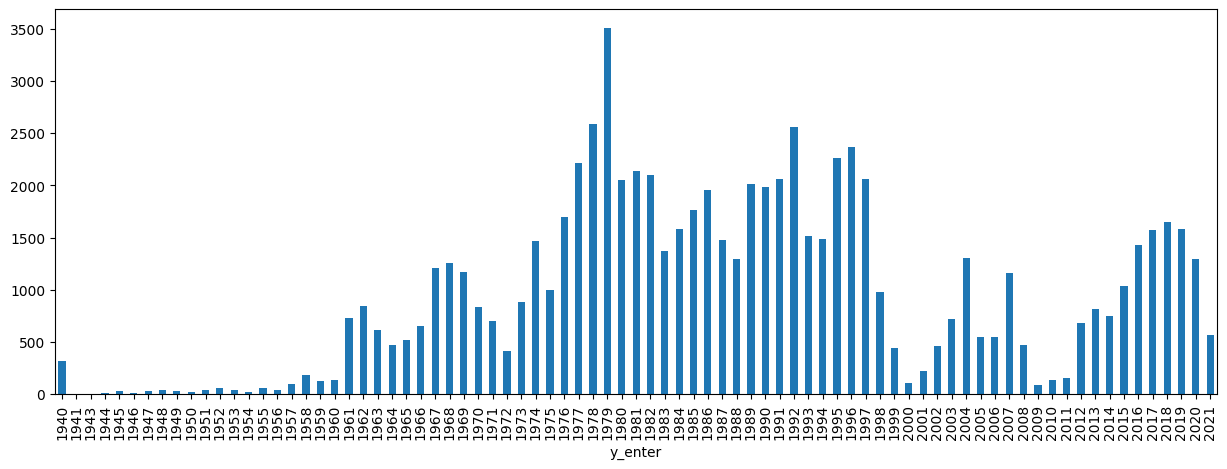

In [ ]:
df['y_enter'].value_counts().sort_index().plot(kind='bar', figsize=(15,5))

In [ ]:
# 2010년 말 기준 직원수 계산
# 입사연도가 2010 년 이하면서
df2010 = df[(df['y_enter'] <= 2010)]
# 2010년 이후에 퇴사한, 그리고 현직인(null 값) 직원
df2010s = df2010[(df2010['y_retire'].isnull()) | (df2010['y_retire'] > 2010)]
len(df2010s)

19914

In [ ]:
# 5) 파생변수 추가
# 해당 연도에서 연령을 추가로 만들어 새로운 열에 저장
# 2010년 기준 나이 계산 및 새 열 만들기
df2010s['age'] = 2010 - df2010s['y_birth']

<ipython-input-11-015121215afb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2010s['age'] = 2010 - df2010s['y_birth']


In [ ]:
df2010s.describe()

,y_birth,y_enter,y_retire,age
count,19914.000000,19914.000000,6921.000000,19914.000000
mean,1967.088681,1992.060360,2016.385638,42.911319
std,8.735980,9.969122,3.020827,8.735980
min,1939.000000,1969.000000,2011.000000,20.000000
25%,1959.000000,1983.000000,2014.000000,36.000000
50%,1967.000000,1992.000000,2017.000000,43.000000
75%,1974.000000,2002.000000,2019.000000,51.000000
max,1990.000000,2010.000000,2021.000000,71.000000


In [ ]:
# reset_indeX() 하는 이유 : 각 행에 고유 숫자를 매겨서 다음에 진행할 ㅇ녀령별 인원수에 활용할 예정이라
df2010_m = df2010s[df2010s['sex'] == '남자'].reset_index()
df2010_f = df2010s[df2010s['sex'] == '여자'].reset_index()

print(len(df2010_m), len(df2010_f))

16932 2982


In [ ]:
# 위의 reset_index로 만든 index를 기준으로 연령별 인원수 계산.
# 연령별 인원수 계산
df2010_mp = df2010_m.groupby("age")['index'].count()
df2010_fp = df2010_f.groupby("age")['index'].count()


In [ ]:
df2010_mp.head()

age
20.0    10
21.0    12
22.0     8
23.0    10
24.0    10
Name: index, dtype: int64

In [ ]:
df2010_fp.head()

age
20.0    2
22.0    1
23.0    1
24.0    8
25.0    8
Name: index, dtype: int64

In [ ]:
# 행 병합을 위해 서로 맞지않는 index를 reset
df2010t = pd.concat([df2010_mp, df2010_fp], axis=1).reset_index()
df2010t.columns = ['연령', '남자', '여자']

In [ ]:
df2010t.head()

,연령,남자,여자
0,20.0,10,2.0
1,21.0,12,NaN
2,22.0,8,1.0
3,23.0,10,1.0
4,24.0,10,8.0


In [ ]:
# 정년은 60세로 동일하게 설정해두기 위해 연령이 넘어가는 인원 삭제
df2010t = df2010t[df2010t['연령']<=60]

In [ ]:
df2010t.describe()

,연령,남자,여자
count,40.000000,40.000000,38.000000
mean,39.500000,423.250000,78.473684
std,11.690452,257.332644,65.160400
min,20.000000,8.000000,1.000000
25%,29.750000,255.750000,18.250000
50%,39.500000,485.500000,60.000000
75%,49.250000,588.500000,135.500000
max,59.000000,809.000000,207.000000


In [ ]:
##   2020년도 같은 방식으로 계산
# 입사연도가 2020 년 이하면서
df2020 = df[(df['y_enter'] <= 2020)]
# 2010년 이후에 퇴사한, 그리고 현직인(null 값) 직원
df2020s = df2020[(df2020['y_retire'].isnull()) | (df2020['y_retire'] > 2020)]
len(df2020s)

23873

In [ ]:
# 2020년도 기준 연령 추가
df2020s['age'] = 2020 - df2020s['y_birth']

<ipython-input-22-6d5296ca9105>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2020s['age'] = 2020 - df2020s['y_birth']


In [ ]:
# reset_indeX() 하는 이유 : 각 행에 고유 숫자를 매겨서 다음에 진행할 연령별 인원수에 활용할 예정이라
df2020_m = df2020s[df2020s['sex'] == '남자'].reset_index()
df2020_f = df2020s[df2020s['sex'] == '여자'].reset_index()

In [ ]:
df2020_mp = df2020_m.groupby("age")['index'].count()
df2020_fp = df2020_f.groupby("age")['index'].count()

df2020t = pd.concat([df2020_mp, df2020_fp], axis=1).reset_index()
df2020t.columns = ['연령', '남자', '여자']

df2020t = df2020t[df2020t['연령']<=60]

In [ ]:
df2020t

,연령,남자,여자
0,18.0,1,1.0
1,19.0,10,19.0
2,20.0,55,26.0
3,21.0,118,47.0
4,22.0,140,54.0
5,23.0,135,104.0
6,24.0,184,188.0
7,25.0,313,263.0
8,26.0,594,320.0
9,27.0,754,303.0


In [ ]:
## 196 페이지

# 존재하지않는 2030년의 데이터 예측
# 통계청에서 인구 시계열 예측을 위해 주로 사용하는 코호트 요인법 사용
# 코호트요인 : 유입과 유출에 대한 그룹을 세분화하고 각각의 모델을 만들어 예측하는 방식. 채용의 경우 유입과 유출이 입사와 퇴사로 명확한 정의가 있지만 환경 변화에 따른 정부 정책, 회사 정책으로 대졸,고졸,전문 인력 채용이 달라지므로 각각의 상황에서 연령별 인력 변화를 예측하기 쉽지 않다. 퇴사의 경우에도 직급별, 연령별 퇴사율과 같은 정보가 공개되지 않았기 때문에 주어진 자료로 분석하기 위해서 다른 방법을 고민할 필요 있음.

# 시계열예측 방법 중 가장 간단한 이동평균법으로 계산
# 차기 예측치를 현시점에서 가까운 n개의 데이터를 평균하여 구하는 방식

#이 예시에서는 가까운 5개년 데이터 적용, 2021년의 연령별 성별 인원을 예측하기 위해서는 16년부터 20년까지의 연령별 성별을 구분한 인원수가 필요. 앞에서 10년과 20년 연령별 성별을 구분한 인원수 테이블을 구할 때 사용했던 방식을 똑같이 적용해 2016년부터 2020년까지 5번 반복. def문을 통해 함수로 정의.

def extract_year(year) :
  df_year = df[(df['y_enter'] <= year)]
  df_year_s = df_year[(df_year['y_retire'].isnull())|(df_year['y_retire']>year)]
  df_year_s['age'] = year-df_year_s['y_birth']
  df_year_m = df_year_s[df_year_s['sex'] == '남자'].reset_index()
  df_year_f = df_year_s[df_year_s['sex'] == '여자'].reset_index()
  print(f'{year}년 전체 {len(df_year_s)}명 중 남자는 {len(df_year_m)}명, 여자는 {len(df_year_f)}명 입니다.')
  df_year_mp = df_year_m.groupby("age")['index'].count().reset_index()
  df_year_mp = df_year_mp.rename(columns={"index":year})
  df_year_fp = df_year_f.groupby("age")['index'].count().reset_index()
  df_year_fp = df_year_fp.rename(columns={"index":year})

  return df_year_mp, df_year_fp


In [ ]:
df2016_mp, df2016_fp = extract_year(2016)

2016년 전체 21322명 중 남자는 17335명, 여자는 3987명 입니다.


<ipython-input-26-f2dcc473ad6e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_s['age'] = year-df_year_s['y_birth']


In [ ]:
df2017_mp, df2017_fp = extract_year(2017)

2017년 전체 22094명 중 남자는 17748명, 여자는 4346명 입니다.


<ipython-input-26-f2dcc473ad6e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_s['age'] = year-df_year_s['y_birth']


In [ ]:
df2018_mp, df2018_fp = extract_year(2018)

2018년 전체 22816명 중 남자는 18165명, 여자는 4651명 입니다.


<ipython-input-26-f2dcc473ad6e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_s['age'] = year-df_year_s['y_birth']


In [ ]:
df2019_mp, df2019_fp = extract_year(2019)

2019년 전체 23526명 중 남자는 18471명, 여자는 5055명 입니다.


<ipython-input-26-f2dcc473ad6e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_s['age'] = year-df_year_s['y_birth']


In [ ]:
df2020_mp, df2020_fp = extract_year(2020)

2020년 전체 23873명 중 남자는 18486명, 여자는 5387명 입니다.


<ipython-input-26-f2dcc473ad6e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_s['age'] = year-df_year_s['y_birth']


In [ ]:
# 5개의 결과를 merge로 ㅎ합하기
def merge_two_dfs(df1, df2):
  return pd.merge(df1, df2, on='age', how='outer')


In [ ]:
# 테이블들을 리스트형식으로 저장
dfs_m = [df2016_mp, df2017_mp, df2018_mp, df2019_mp, df2020_mp]
dfs_f = [df2016_fp, df2017_fp, df2018_fp, df2019_fp, df2020_fp]

In [ ]:
# 함수를 연속적으로 실행할 때 reduce 함수 사용. 아래 reduce 함수를 불러온 다음 함수 실행
from functools import reduce
df_years_m = reduce(merge_two_dfs, dfs_m)

In [ ]:
# 60세 이상 인원은 정년퇴직으로 간주하여 제외
df_years_mt = df_years_m[df_years_m['age'] <= 60]
df_years_mt.head()

,age,2016,2017,2018,2019,2020
0,17.0,12.0,12.0,NaN,NaN,NaN
1,18.0,111.0,111.0,12.0,NaN,1.0
2,19.0,112.0,131.0,111.0,14.0,10.0
3,20.0,121.0,118.0,133.0,114.0,55.0
4,21.0,72.0,122.0,119.0,135.0,118.0


In [ ]:
df_years_mt.iloc[:, 1:6]

,2016,2017,2018,2019,2020
0,12.0,12.0,NaN,NaN,NaN
1,111.0,111.0,12.0,NaN,1.0
2,112.0,131.0,111.0,14.0,10.0
3,121.0,118.0,133.0,114.0,55.0
4,72.0,122.0,119.0,135.0,118.0
5,129.0,79.0,122.0,121.0,140.0
6,93.0,147.0,96.0,146.0,135.0
7,112.0,202.0,244.0,163.0,184.0
8,225.0,322.0,394.0,441.0,313.0
9,303.0,452.0,575.0,616.0,594.0


In [ ]:
# 2021년의 데이터를 이동평균법으로 구하기
# 2021년 열 추가, 2번째 열 (2016년) 부터 6번째 열(2020년)까지의 평균을 연령별로 구하기
# shift 사용 이유 : 1년이 지나면 연령이 한 살 올라가기 때문에 평균을 구한 값을 한 행씩 내려줘야 하기 때문
# -> 예를들어 16년에 20살인 사람이 17년에 21살이 됨. 17년에 21살인 122명은 기존 121명에서 1명이 신규 채용된 것으로 볼 수 있음.
# axis=1 열방향 평균
df_years_mt[2021] = df_years_mt.iloc[:, 1:6].mean(axis=1).shift(1)

# 위처럼 하면, window가 5로 고정되는게 아니라.. NaN 값은 제외된 count가 분모로 취해지는데 이렇게 해도 되는지? 궁금하다.. -> 메일 보냄
# 저자님께서 NaN->0 으로 바꿔서 이동평균법을 적용하는게 맞을 것 같다고 해주셨지만 책 그대로 실습을 위해 우선 원래 코드로 진행 (24.04.22)



<ipython-input-37-3d87e5f409cf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_years_mt[2021] = df_years_mt.iloc[:, 1:6].mean(axis=1).shift(1)


In [ ]:
for i in range(10):
  df_years_mt[2021+i] = df_years_mt.iloc[:, 1+i:6+i].mean(axis=1).round(0).shift(1)


<ipython-input-38-32d9a45eee3a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_years_mt[2021+i] = df_years_mt.iloc[:, 1+i:6+i].mean(axis=1).round(0).shift(1)
<ipython-input-38-32d9a45eee3a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_years_mt[2021+i] = df_years_mt.iloc[:, 1+i:6+i].mean(axis=1).round(0).shift(1)
<ipython-input-38-32d9a45eee3a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [ ]:
df_years_mt

,age,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
0,17.0,12.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18.0,111.0,111.0,12.0,NaN,1.0,12.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19.0,112.0,131.0,111.0,14.0,10.0,59.0,34.0,9.0,8.0,8.0,12.0,12.0,NaN,NaN,NaN
3,20.0,121.0,118.0,133.0,114.0,55.0,76.0,65.0,46.0,25.0,24.0,24.0,14.0,10.0,10.0,11.0
4,21.0,72.0,122.0,119.0,135.0,118.0,108.0,99.0,89.0,71.0,53.0,47.0,37.0,27.0,19.0,16.0
5,22.0,129.0,79.0,122.0,121.0,140.0,113.0,120.0,116.0,110.0,97.0,84.0,72.0,59.0,47.0,37.0
6,23.0,93.0,147.0,96.0,146.0,135.0,118.0,115.0,123.0,122.0,120.0,111.0,105.0,96.0,84.0,72.0
7,24.0,112.0,202.0,244.0,163.0,184.0,123.0,128.0,122.0,127.0,123.0,120.0,118.0,116.0,111.0,103.0
8,25.0,225.0,322.0,394.0,441.0,313.0,181.0,183.0,168.0,144.0,137.0,125.0,124.0,122.0,121.0,118.0
9,26.0,303.0,452.0,575.0,616.0,594.0,339.0,330.0,302.0,257.0,198.0,163.0,151.0,140.0,130.0,126.0


In [ ]:
dfs_f = [df2016_fp, df2017_fp, df2018_fp, df2019_fp, df2020_fp]
df_years_f = reduce(merge_two_dfs, dfs_f)
df_years_ft = df_years_f[df_years_f['age'] <= 60]
df_years_ft.head()

,age,2016,2017,2018,2019,2020
0,17.0,3,3,NaN,NaN,NaN
1,18.0,32,38,3.0,2.0,1.0
2,19.0,42,38,38.0,13.0,19.0
3,20.0,27,45,38.0,44.0,26.0
4,21.0,24,28,44.0,43.0,47.0


In [ ]:
for i in range(10):
  df_years_ft[2021+i] = df_years_ft.iloc[:, 1+i:6+i].mean(axis=1).round(0).shift(1)
df_years_ft.head()

,age,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
0,17.0,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18.0,32,38,3.0,2.0,1.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19.0,42,38,38.0,13.0,19.0,15.0,9.0,2.0,2.0,2.0,3.0,3.0,NaN,NaN,NaN
3,20.0,27,45,38.0,44.0,26.0,30.0,25.0,19.0,12.0,9.0,6.0,4.0,2.0,2.0,3.0
4,21.0,24,28,44.0,43.0,47.0,36.0,37.0,33.0,29.0,22.0,19.0,14.0,10.0,7.0,5.0


In [ ]:
# 연령 열을 기준으로 남성과 여성 열을 연결. 앞에서 미리 def 문으로 만들어두었던 merge_two_dfs 함수를 사용
df_2030_m = df_years_mt[['age', 2030]]
df_2030_f = df_years_ft[['age', 2030]]

In [ ]:
df2030t = merge_two_dfs(df_2030_m, df_2030_f)
df2030t.columns = ['연령', '남자', '여자']

In [ ]:
df2030t

,연령,남자,여자
0,17.0,NaN,NaN
1,18.0,NaN,NaN
2,19.0,NaN,NaN
3,20.0,11.0,3.0
4,21.0,16.0,5.0
5,22.0,37.0,14.0
6,23.0,72.0,27.0
7,24.0,103.0,37.0
8,25.0,118.0,47.0
9,26.0,126.0,72.0


In [ ]:
# 3.2.7 시각화하기 - 203page
# CHO가 원하는 것은 MZ세대를 포함한 우리 회사 세대벼 인원별 분포와 연도별 추세.
# 세대 갈등은 이전에도 있었다. MZ세대가 특별한 것이 아니라 세대 이동에 따른 자연스러운 현상이다. -> 10년 주기에 따른 세대별 비중을 보여준다.
# 그럼에도 사내에서 해결할 부분을 고민해야 할 것이다. -> 회사 정책으로 인해 세대 갈등이 일어난 부분을 찾는다.

# 1) 차트 선택
# 0년 주기에 따른 세대별 분포 변화를 남성과 여성으로 나눠 시계열로 보여주는 것.
# 버터플라이 차트 butterfly chart

# 2) 적절한 데이터 준비
# Z세대의 시작연도 1996년도, 밀레니얼 시대의 시작 연도 1980년, X세대의 시작 연도 1965년, 베이비붐의 시작 연도 1950년

c_year = 2010
z_start = 1996
mil_start = 1980
x_start = 1965
baby_start = 1950



In [ ]:
# 맷 플롯립 라이브러리
import matplotlib.pyplot as plt

In [ ]:
font_color = '#525252'
facecolor = '#eaeaf2'
color_red = '#fd625e'
color_blue = '#01b8aa'
index = df2010t['연령']
column0 = df2010t['남자']
column1 = df2010t['여자']
title0 = 'Male'
title1 = 'Female'

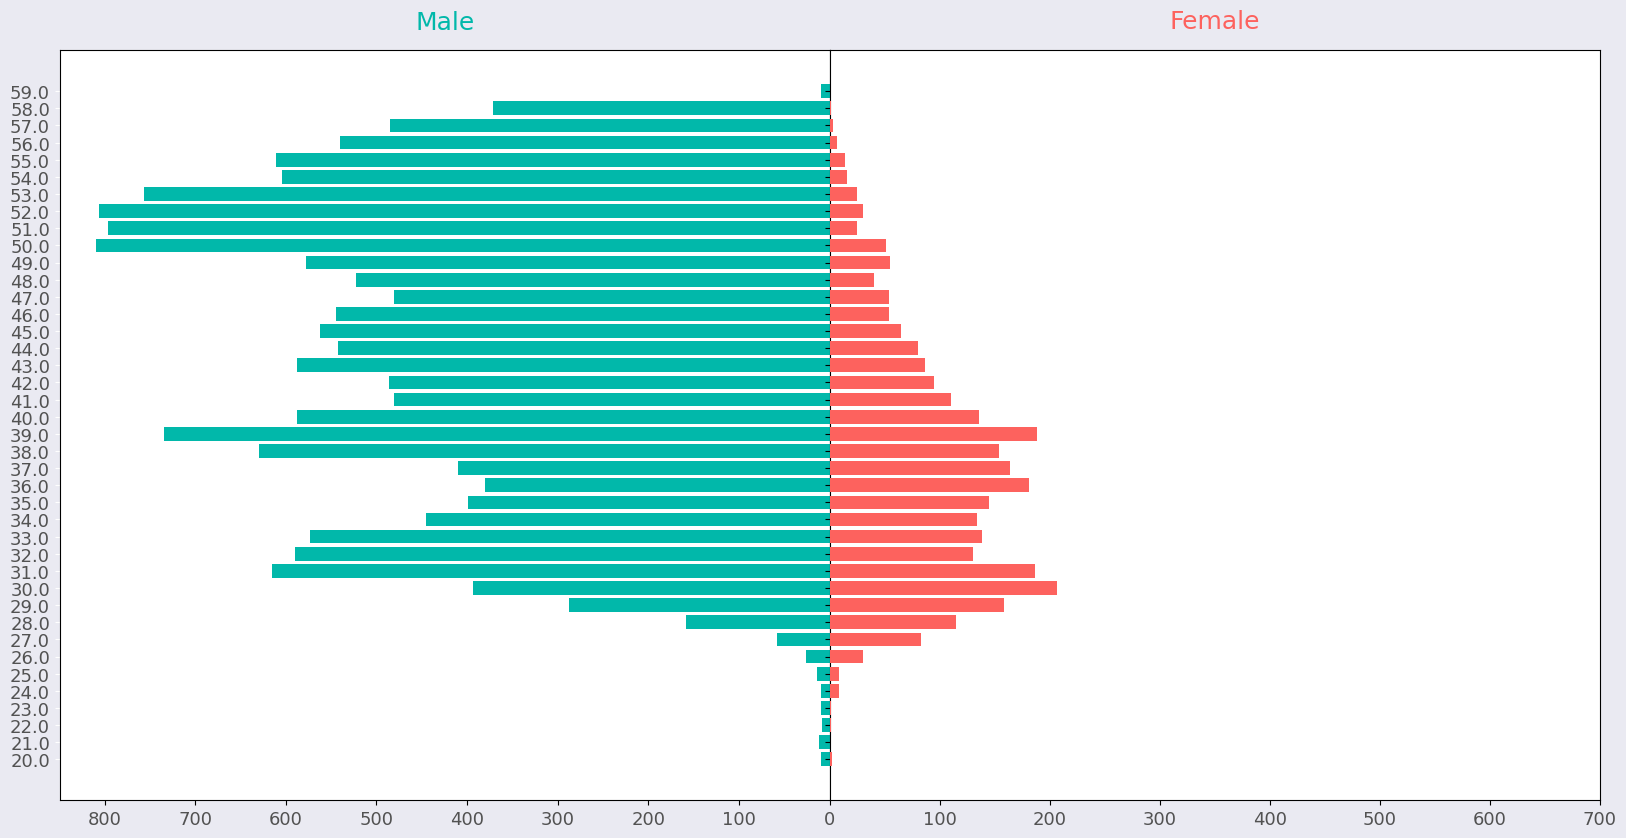

In [ ]:
# fig, axes = plt.subplots(figsize = (20,10), facecolor = facecolor, ncols=2, sharey = True)
# fig.tight_layout()

# axes[1].barh(index, column1, align='center', color=color_red, zorder=10)
# axes[1].set_title(title1, fontsize=18, pad=16, color=color_red)
# axes[0].barh(index, column0, align='center', color=color_blue, zorder=10)
# axes[0].set_title(title0, fontsize=18, pad=15, color=color_blue)

# axes[0].invert_xaxis()
# axes[0].set(yticks=index, yticklabels=index)
# axes[0].yaxis.tick_left()
# axes[0].tick_params(axis='y', colors='white') #tick color
# axes[1].set_xticks([100, 200, 300, 400, 500, 600, 700])
# axes[1].set_xticklabels([100,200,300,400,500,600,700])

# for label in (axes[0].get_xticklabels() + axes[0].get_yticklabels()):
#   label.set(fontsize=13, color=font_color)
# for label in (axes[1].get_xticklabels() + axes[1].get_yticklabels()):
#   label.set(fontsize=13, color=font_color)

# plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)

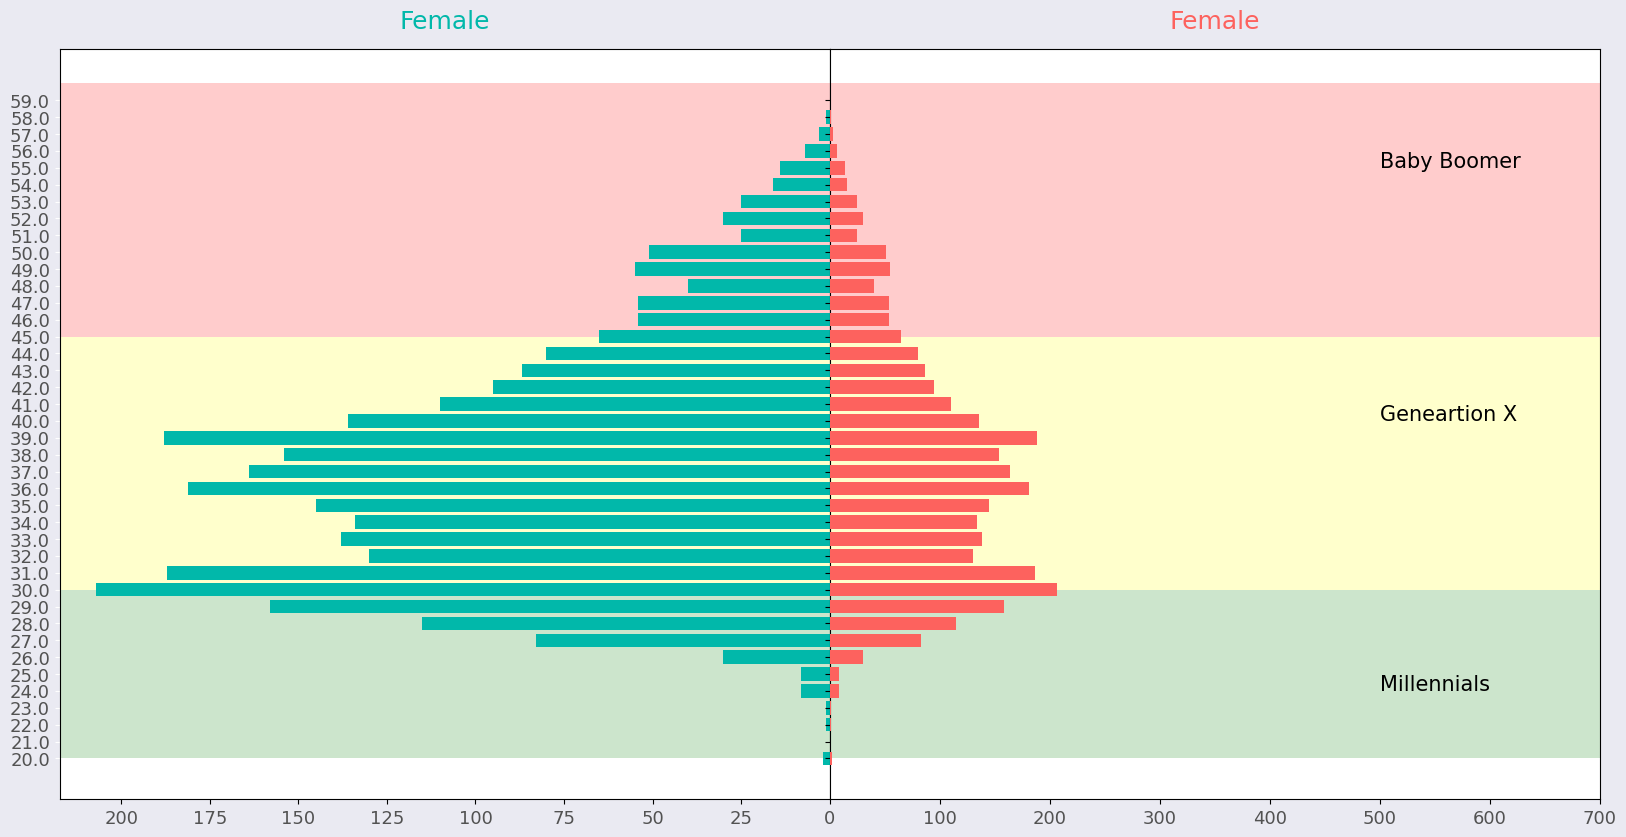

In [ ]:
# baby boomer ~ millennials
fig, axes = plt.subplots(figsize=(20,10), facecolor = facecolor, ncols =2, sharey=True)
fig.tight_layout()

axes[1].barh(index, column1, align='center', color=color_red, zorder=10)
axes[1].set_title(title1, fontsize=18, pad=15, color=color_red)
axes[0].barh(index, column1, align='center', color=color_blue, zorder=10)
axes[0].set_title(title1, fontsize=18, pad=15, color=color_blue)

# If you have positive numberes and want to invert the x-axis of the left plot
axes[0].invert_xaxis()

# To show data from highest to lowest
axes[0].set(yticks=index, yticklabels=index)
axes[0].yaxis.tick_left()
axes[0].tick_params(axis='y', colors='white') # tick color
axes[1].set_xticks([100, 200, 300, 400, 500, 600, 700])
axes[1].set_xticklabels([100, 200, 300, 400, 500, 600, 700])

for label in (axes[0].get_xticklabels() + axes[0].get_yticklabels()):
  label.set(fontsize=13, color=font_color)
for label in (axes[1].get_xticklabels() + axes[1].get_yticklabels()):
  label.set(fontsize=13, color=font_color)

# axhspan() 함수는 수평으로 색상이 채워진 사각형 생성. 여기서는 색상이 다른 3가지 사각형 (세대별 구분)을 만든다. 각 사각혀으이 색상은 face color 인자로 설정되고 투명도는 alpha 인자로 설정된다. 남자 파트 (axes[0]), 여자파트(axes[1]) 각 axhspan() 함수로 사각형을 생성해준다.
# text() 함수를 사용하여 그래프 위에 글씨를 추가했다. text() 함수는 텍스트를 그래프에 추가할 수 있다. font size 인자로 텍스트 크기를, xy 인자로 텍스트의 위치를 지정한다.
axes[0].axhspan(20, c_year - mil_start, facecolor='green', alpha=0.2)
axes[0].axhspan(c_year - mil_start, c_year - x_start, facecolor = 'yellow', alpha = 0.2)
axes[0].axhspan(c_year - x_start, 60, facecolor = 'red', alpha=0.2)

axes[1].axhspan(20, c_year - mil_start, facecolor = 'green', alpha = 0.2)
axes[1].axhspan(c_year - mil_start, c_year - x_start, facecolor = 'yellow', alpha = 0.2)
axes[1].axhspan(c_year - x_start, 60, facecolor = 'red', alpha=0.2)

axes[1].text(500, 55, r'Baby Boomer', fontsize=15)
axes[1].text(500, 40, r'Geneartion X', fontsize=15)
axes[1].text(500, 24, r'Millennials', fontsize=15)

plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)

In [ ]:
# 2020년 그리기. baby boomer ~ gen z
c_year = 2020
font_color = '#525252'
face_color = '#eaeaf2'
color_red = '#fd625e'
color_blue = '#01b8aa'

index = df2020t['연령']
column0 = df2020t['남자']
column1 = df2020t['여자']
title0 = 'Male'
title1 = 'Female'

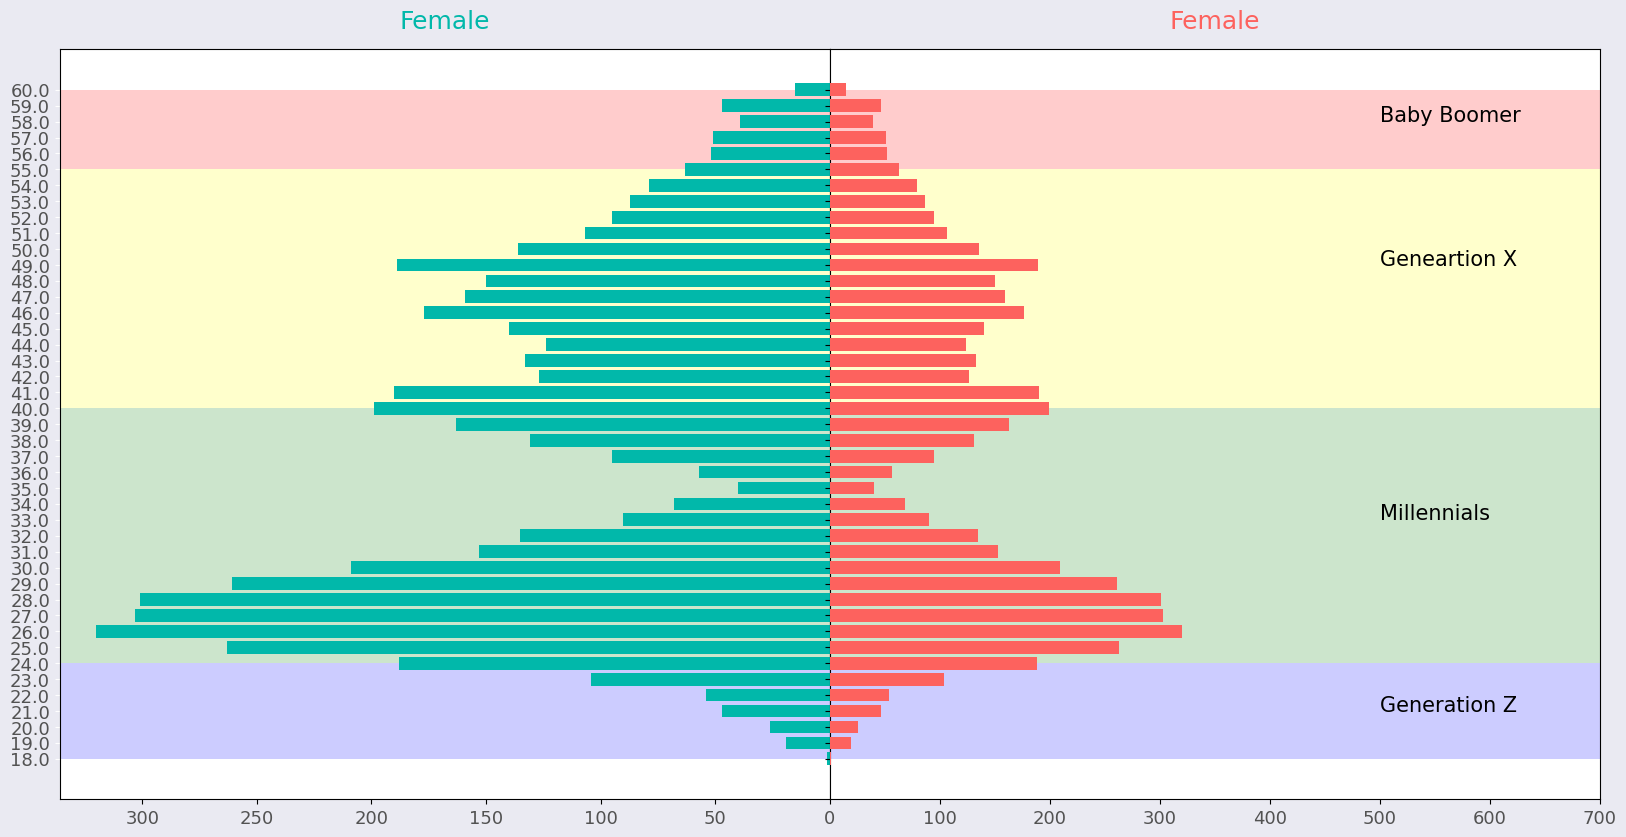

In [ ]:
fig, axes = plt.subplots(figsize=(20,10), facecolor = facecolor, ncols =2, sharey=True)
fig.tight_layout()

axes[1].barh(index, column1, align='center', color=color_red, zorder=10)
axes[1].set_title(title1, fontsize=18, pad=15, color=color_red)
axes[0].barh(index, column1, align='center', color=color_blue, zorder=10)
axes[0].set_title(title1, fontsize=18, pad=15, color=color_blue)

# If you have positive numberes and want to invert the x-axis of the left plot
axes[0].invert_xaxis()

# To show data from highest to lowest
axes[0].set(yticks=index, yticklabels=index)

axes[0].yaxis.tick_left()
axes[0].tick_params(axis='y', colors='white') # tick color

axes[1].set_xticks([100, 200, 300, 400, 500, 600, 700])
axes[1].set_xticklabels([100, 200, 300, 400, 500, 600, 700])

for label in (axes[0].get_xticklabels() + axes[0].get_yticklabels()):
  label.set(fontsize=13, color=font_color)
for label in (axes[1].get_xticklabels() + axes[1].get_yticklabels()):
  label.set(fontsize=13, color=font_color)

# axhspan() 함수는 수평으로 색상이 채워진 사각형 생성. 여기서는 색상이 다른 3가지 사각형 (세대별 구분)을 만든다. 각 사각혀으이 색상은 face color 인자로 설정되고 투명도는 alpha 인자로 설정된다. 남자 파트 (axes[0]), 여자파트(axes[1]) 각 axhspan() 함수로 사각형을 생성해준다.
# text() 함수를 사용하여 그래프 위에 글씨를 추가했다. text() 함수는 텍스트를 그래프에 추가할 수 있다. font size 인자로 텍스트 크기를, xy 인자로 텍스트의 위치를 지정한다.

# 2020 년 추가되면서 바뀜
axes[0].axhspan(18, c_year-z_start, facecolor='blue', alpha=0.2)
axes[0].axhspan(c_year - z_start, c_year - mil_start, facecolor='green', alpha=0.2)
axes[0].axhspan(c_year - mil_start, c_year-x_start, facecolor = 'yellow', alpha = 0.2)
axes[0].axhspan(c_year - x_start, 60, facecolor = 'red', alpha=0.2)

axes[1].axhspan(18, c_year-z_start, facecolor='blue', alpha=0.2)
axes[1].axhspan(c_year - z_start, c_year - mil_start, facecolor='green', alpha=0.2)
axes[1].axhspan(c_year - mil_start, c_year-x_start, facecolor = 'yellow', alpha = 0.2)
axes[1].axhspan(c_year - x_start, 60, facecolor = 'red', alpha=0.2)
# 글자 위치도 조정
axes[1].text(500, 58, r'Baby Boomer', fontsize=15)
axes[1].text(500, 49, r'Geneartion X', fontsize=15)
axes[1].text(500, 33, r'Millennials', fontsize=15)
axes[1].text(500, 21, r'Generation Z', fontsize=15)

plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)

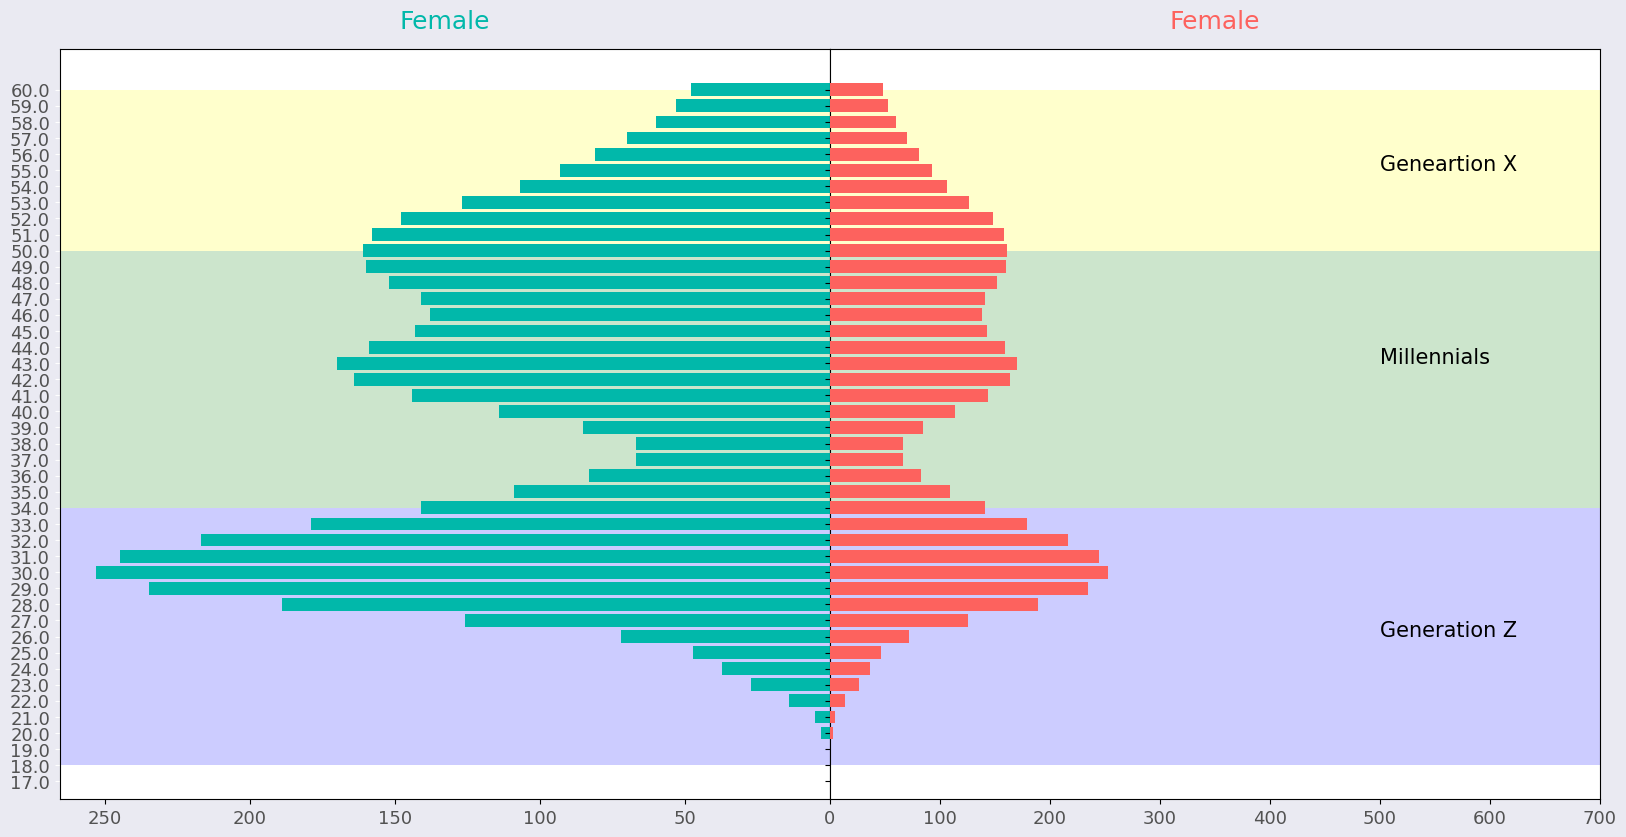

In [ ]:
c_year = 2030
font_color = '#525252'
facecolor = '#eaeaf2'
color_red = '#fd625e'
color_blue = '#01b8aa'
index = df2030t['연령']
column0 = df2030t['남자']
column1 = df2030t['여자']
title0 = 'Male'
title1 = 'Female'

# gen X ~ gen Z
fig, axes = plt.subplots(figsize=(20,10), facecolor = facecolor, ncols =2, sharey=True)
fig.tight_layout()

axes[1].barh(index, column1, align='center', color=color_red, zorder=10)
axes[1].set_title(title1, fontsize=18, pad=15, color=color_red)
axes[0].barh(index, column1, align='center', color=color_blue, zorder=10)
axes[0].set_title(title1, fontsize=18, pad=15, color=color_blue)

# If you have positive numberes and want to invert the x-axis of the left plot
axes[0].invert_xaxis()

# To show data from highest to lowest
axes[0].set(yticks=index, yticklabels=index)

axes[0].yaxis.tick_left()
axes[0].tick_params(axis='y', colors='white') # tick color

axes[1].set_xticks([100, 200, 300, 400, 500, 600, 700])
axes[1].set_xticklabels([100, 200, 300, 400, 500, 600, 700])

for label in (axes[0].get_xticklabels() + axes[0].get_yticklabels()):
  label.set(fontsize=13, color=font_color)
for label in (axes[1].get_xticklabels() + axes[1].get_yticklabels()):
  label.set(fontsize=13, color=font_color)

# axhspan() 함수는 수평으로 색상이 채워진 사각형 생성. 여기서는 색상이 다른 3가지 사각형 (세대별 구분)을 만든다. 각 사각혀으이 색상은 face color 인자로 설정되고 투명도는 alpha 인자로 설정된다. 남자 파트 (axes[0]), 여자파트(axes[1]) 각 axhspan() 함수로 사각형을 생성해준다.
# text() 함수를 사용하여 그래프 위에 글씨를 추가했다. text() 함수는 텍스트를 그래프에 추가할 수 있다. font size 인자로 텍스트 크기를, xy 인자로 텍스트의 위치를 지정한다.

# gen x ~ gen z 되면서 바뀜
axes[0].axhspan(18, c_year-z_start, facecolor='blue', alpha=0.2)
axes[0].axhspan(c_year - z_start, c_year - mil_start, facecolor='green', alpha=0.2)
axes[0].axhspan(c_year - mil_start, 60, facecolor = 'yellow', alpha = 0.2)
# axes[0].axhspan(c_year - x_start, 60, facecolor = 'red', alpha=0.2)

axes[1].axhspan(18, c_year-z_start, facecolor='blue', alpha=0.2)
axes[1].axhspan(c_year - z_start, c_year - mil_start, facecolor='green', alpha=0.2)
axes[1].axhspan(c_year - mil_start, 60, facecolor = 'yellow', alpha = 0.2)
# axes[1].axhspan(c_year - x_start, 60, facecolor = 'red', alpha=0.2)

# 글자 위치도 조정
# axes[1].text(500, 58, r'Baby Boomer', fontsize=15)
axes[1].text(500, 55, r'Geneartion X', fontsize=15)
axes[1].text(500, 43, r'Millennials', fontsize=15)
axes[1].text(500, 26, r'Generation Z', fontsize=15)

plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)

In [ ]:
# 2010, 2020, 203년 그래프를 횡으로 붙여서 보고용 시각화를 만든다
# 태블로 사용